In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/Benson/Documents/NCPL Projects/Sentiment Analysis/data.csv")#https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [3]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [4]:
df['Sentence'] = df['Sentence'].str.lower()
df['Sentence'] = df['Sentence'].str.replace("[^\w\s]","")
df['Sentence'] = df['Sentence'].str.replace("\d+","")
df['Sentence'] = df['Sentence'].str.replace("\n","").replace("\r","")
df_neutral = df[df['Sentiment'] == 'neutral']
df_positive = df[df['Sentiment'] == 'positive']
df_negative = df[df['Sentiment'] == 'negative']
df['Sentiment'] = df['Sentiment'].map({"negative" : 0, "positive" : 1, "neutral" : 2})
df['Sentiment'] = df['Sentiment'].astype(int)
df1 = df[df['Sentiment'] != 2]
df1

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,1
1,esi on lows down to bk a real possibility,0
2,for the last quarter of componenta s net sal...,1
5,spy wouldnt be surprised to see a green close,1
6,shells billion bg deal meets shareholder skep...,0
...,...,...
5832,operating profit fell to eur mn from eur mn ...,0
5835,hsbc says unit to book million charge on sett...,0
5836,daily mail parent company in talks with potent...,1
5837,rising costs have forced packaging producer hu...,0


In [5]:
vect = CountVectorizer(lowercase = True, stop_words = "english")
x = df1.Sentence 
y = df1.Sentiment
x = vect.fit_transform(x)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [7]:
k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()

def sentiment_classification_funct(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 60)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos = [k, d, r, l, mb]
    algo_names = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 
                  'LogisticRegression', 'MultinomialNB']
    
    accuracy_scored = []
    precision_scored = []
    recall_scored = []
    f1_scored = []
    
    for i in algos:
        i.fit(x_train, y_train)
        accuracy_scored.append(accuracy_score(y_test, i.predict(x_test)))
        precision_scored.append(precision_score(y_test, i.predict(x_test)))
        recall_scored.append(recall_score(y_test, i.predict(x_test)))
        f1_scored.append(f1_score(y_test, i.predict(x_test))) 
        
    res = pd.DataFrame(columns = ['f1_score', 'recall_score', 'precision_score','accuracy_score'], index = algo_names)
    res.f1_score = f1_scored
    res.recall_score = recall_scored
    res.precision_score = precision_scored
    res.accuracy_score = accuracy_scored
        
        
        
    sentiment_classification_funct.result=res.sort_values('f1_score',ascending=False)
    return res.sort_values('f1_score',ascending=False)

In [8]:
sentiment_classification_funct(x,y)

(2169, 6598) (543, 6598) (2169,) (543,)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.877451,0.952128,0.813636,0.815838
LogisticRegression,0.872818,0.930851,0.821596,0.812155
MultinomialNB,0.864430,0.856383,0.872629,0.813996
DecisionTreeClassifier,0.832461,0.845745,0.819588,0.764273
KNeighborsClassifier,0.825359,0.917553,0.750000,0.731123


In [31]:
conda install -c conda-forge wordcloud


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Benson\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    wordcloud-1.9.2            |   py39h2bbff1b_0         184 KB
    ------------------------------------------------------------
                                           Total:         493 KB

The following NEW packages will be INSTALLED:

  wordcloud          pkgs/main/win-64::wordcloud-1.9.2-py39h2bbff1b_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.12.12~ --> conda-forge::ca-cert



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [11]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------- ------------------------ 235.5/626.3 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

In [14]:
def wc(data,bgcolor):
    
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("C:/Users/Benson/Desktop/GE.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

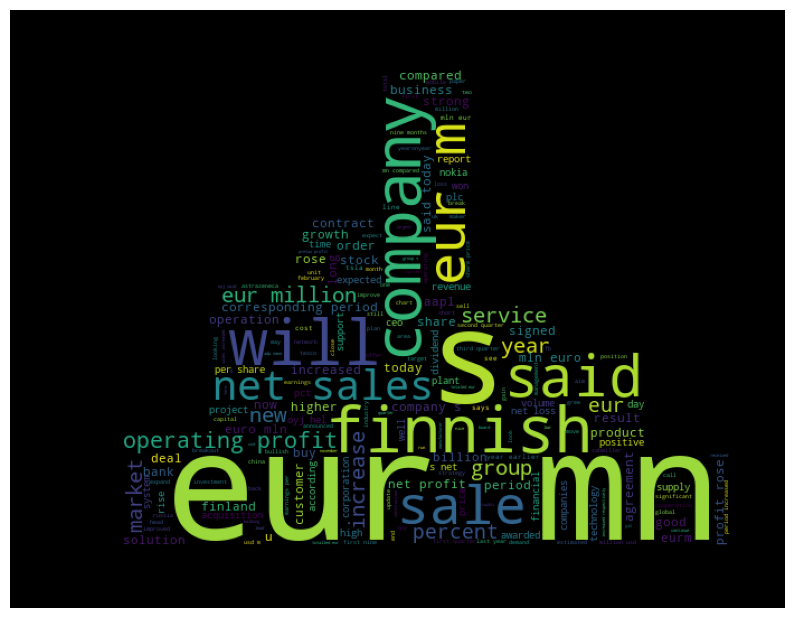

In [15]:
wc(df_positive.Sentence,"black")